# Coronavirus Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Coronavirus Stock
symbols = ['GE','F','GM','CAH','RMD','MDT','CVS','RAD','WAL']
start = '2019-12-01'
end = '2020-03-31'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

119

In [7]:
df.head()

,GE,F,GM,CAH,RMD,MDT,CVS,RAD,WAL
Date,,,,,,,,,
2019-12-02,11.138830,8.859331,35.071316,53.584694,148.676666,109.697014,75.043564,8.81,52.024551
2019-12-03,10.969152,8.741339,34.729202,53.476814,149.135651,109.776138,74.209198,8.61,51.536667
2019-12-04,10.879322,8.800335,34.993114,53.721989,149.814117,110.715752,74.497253,8.44,52.392956
2019-12-05,10.769532,8.780669,34.884445,53.202225,149.844055,110.972908,73.980743,8.04,52.850975
2019-12-06,11.078944,8.869164,35.111671,53.810249,150.253143,111.853165,74.854836,8.29,53.528034


In [8]:
df.tail()

,GE,F,GM,CAH,RMD,MDT,CVS,RAD,WAL
Date,,,,,,,,,
2020-03-24,7.01,4.95,21.110001,43.107567,135.059998,79.850243,54.349998,16.26,28.480000
2020-03-25,7.56,5.39,21.490000,41.830379,135.710007,86.279999,53.639999,14.47,28.930000
2020-03-26,8.12,5.25,22.559999,44.949097,146.520004,91.940002,58.310001,14.11,32.529999
2020-03-27,7.62,5.19,21.379999,43.939224,141.949997,89.889999,58.599998,15.07,30.709999
2020-03-30,7.89,5.03,21.320000,47.958900,154.210007,92.050003,59.680000,14.61,30.580000


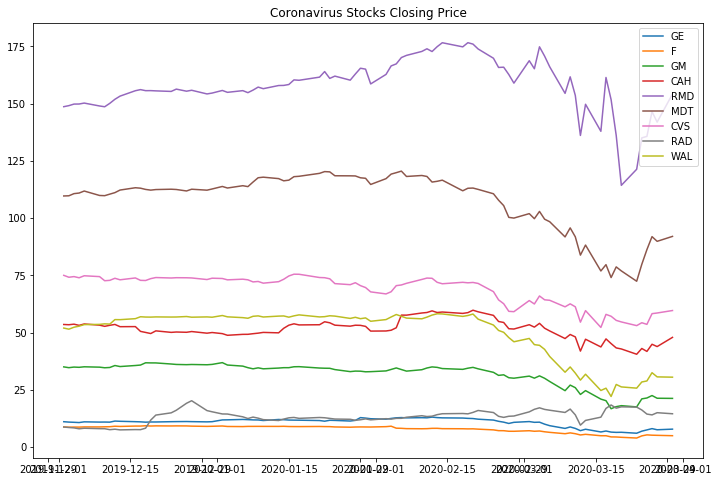

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Coronavirus Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

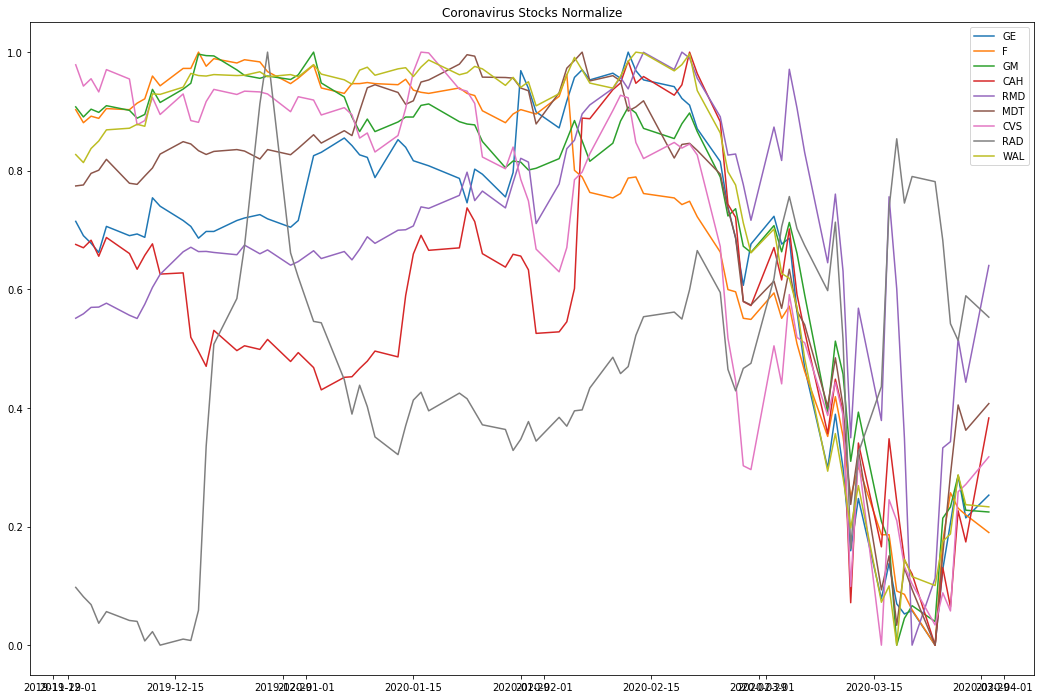

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Coronavirus Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

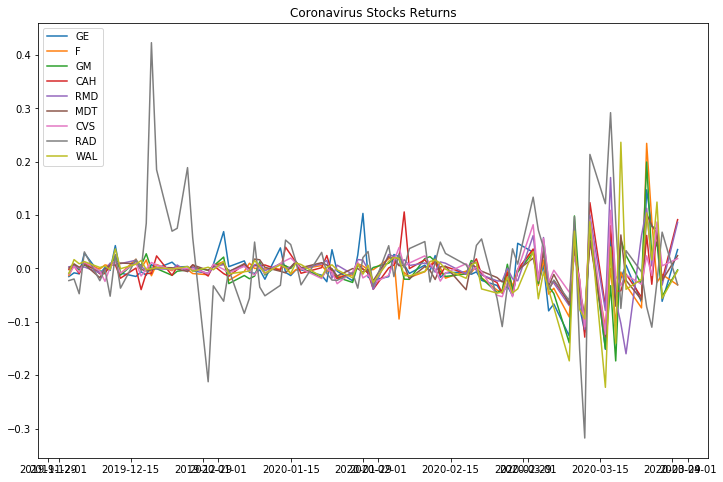

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Coronavirus Stocks Returns')
plt.legend(labels=stock_rets.columns)

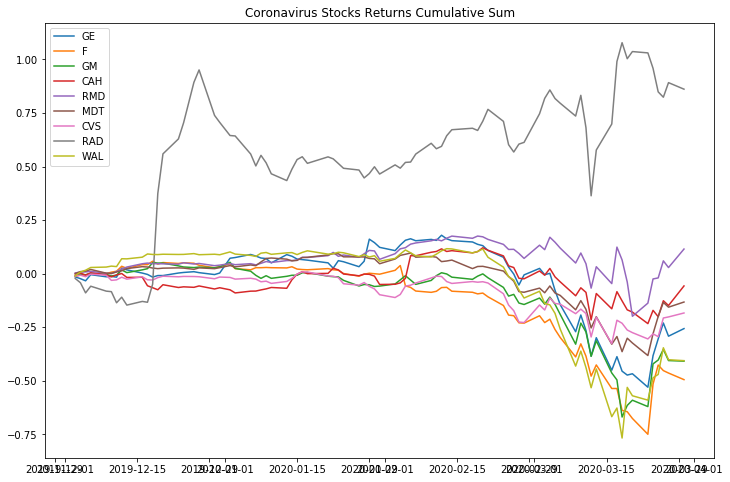

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Coronavirus Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

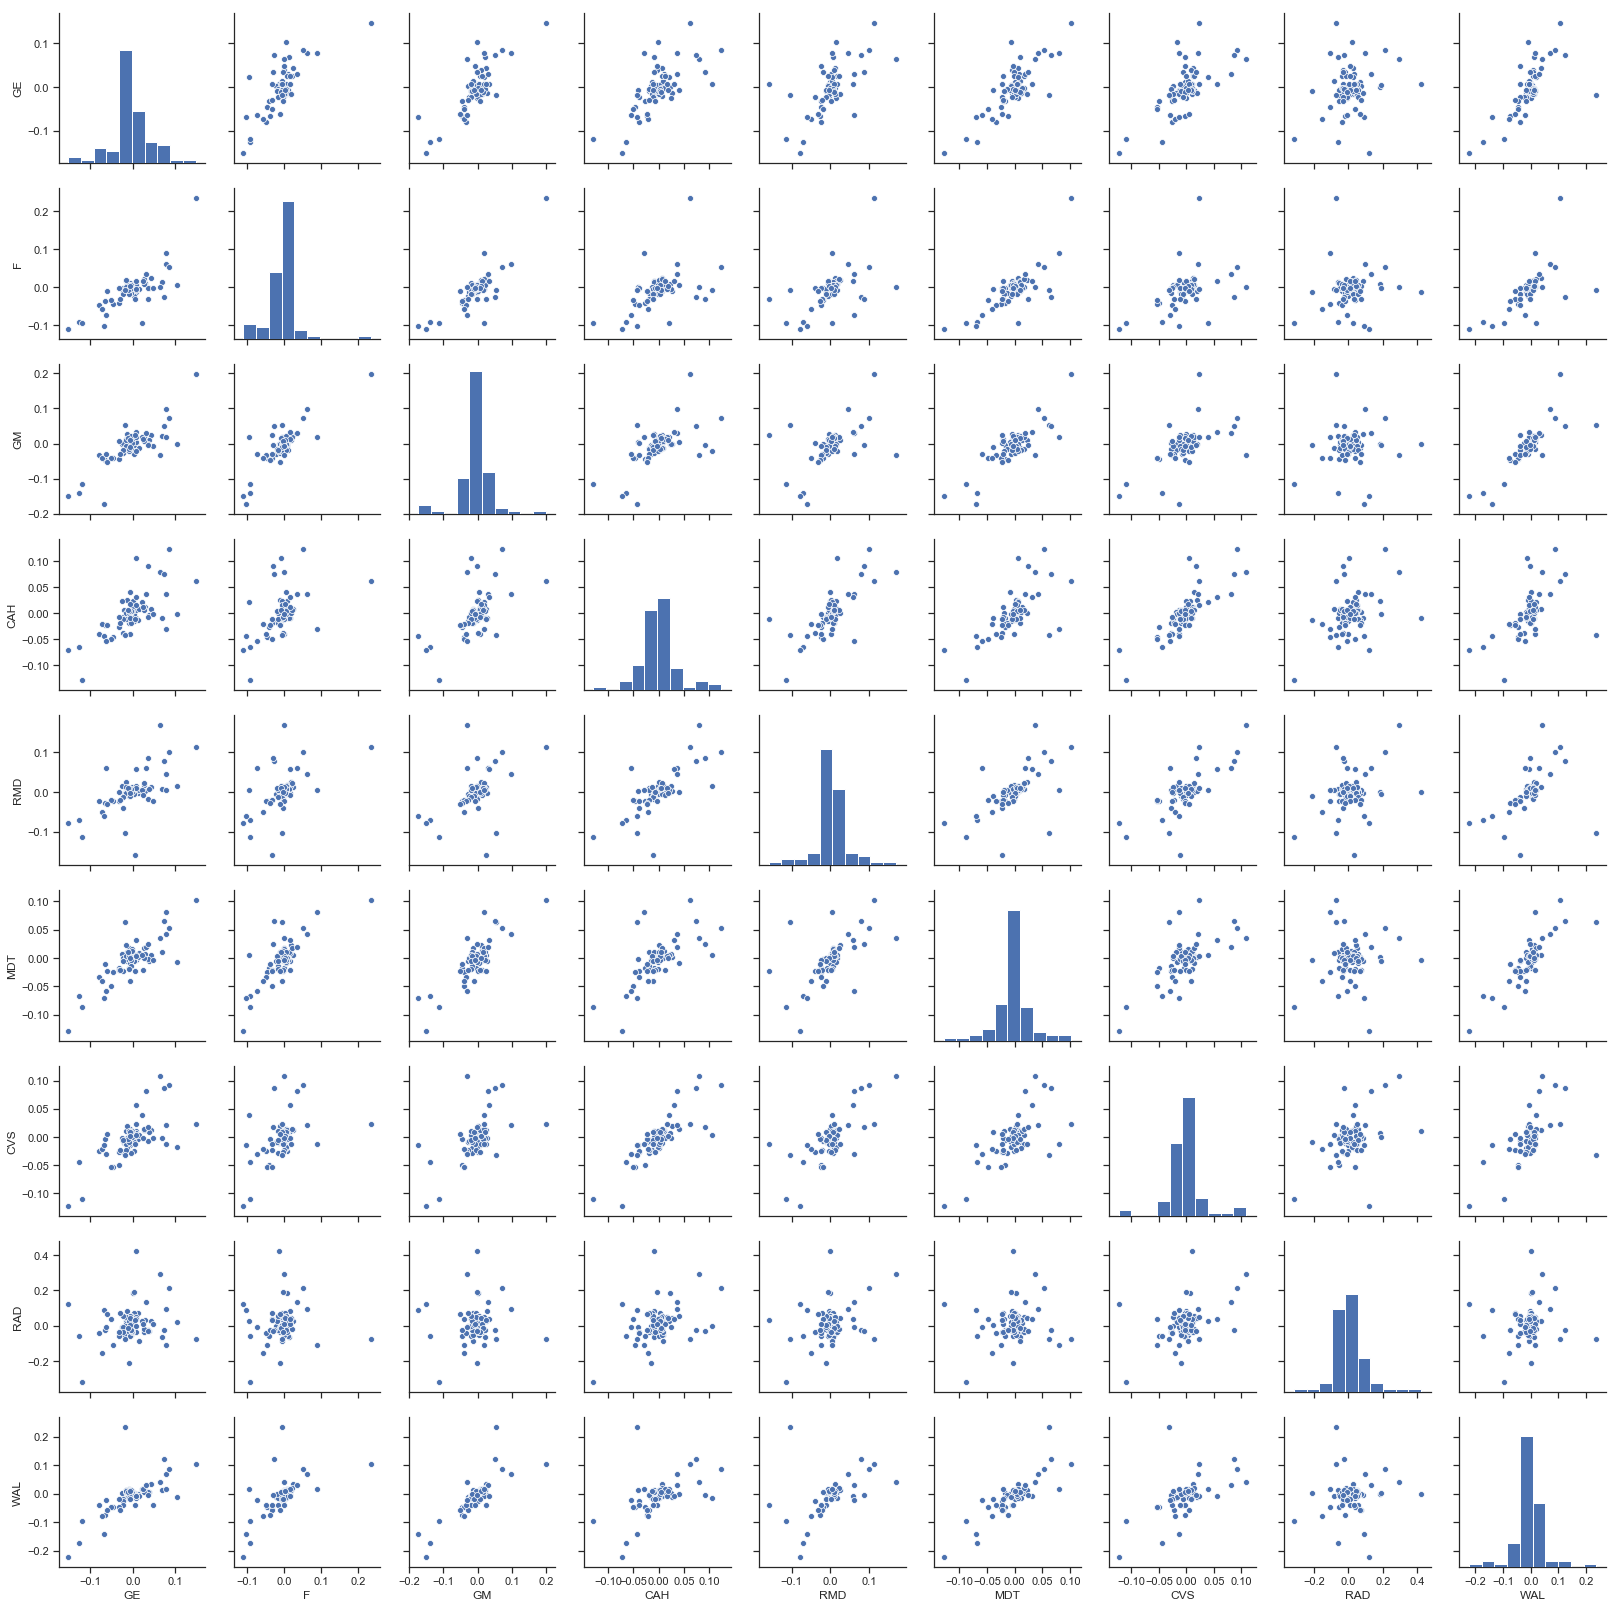

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

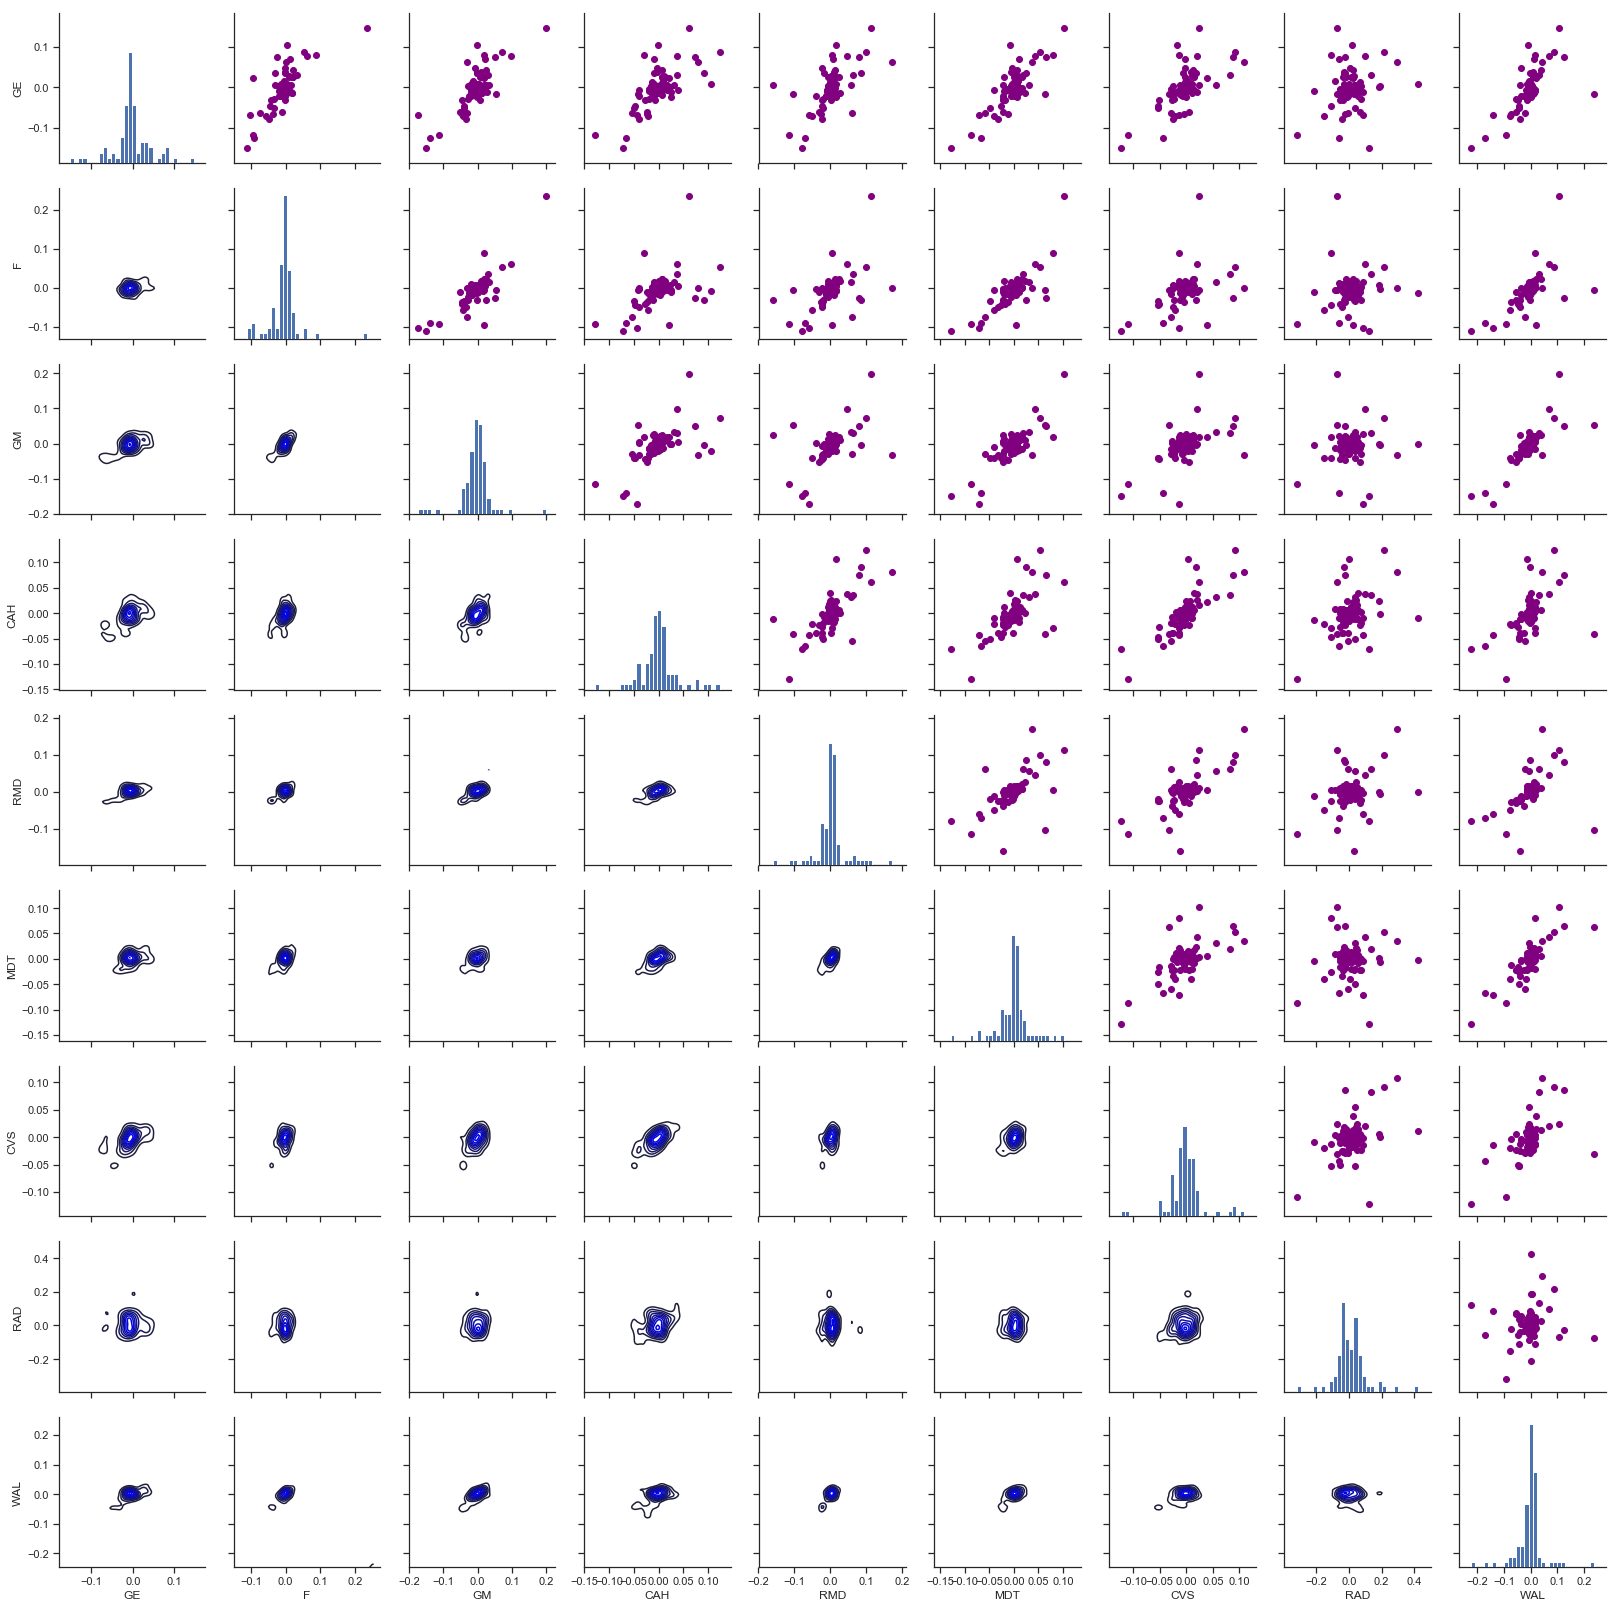

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

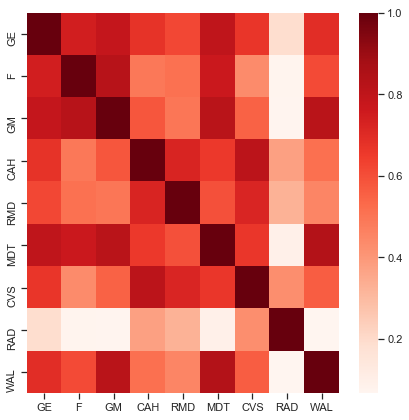

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

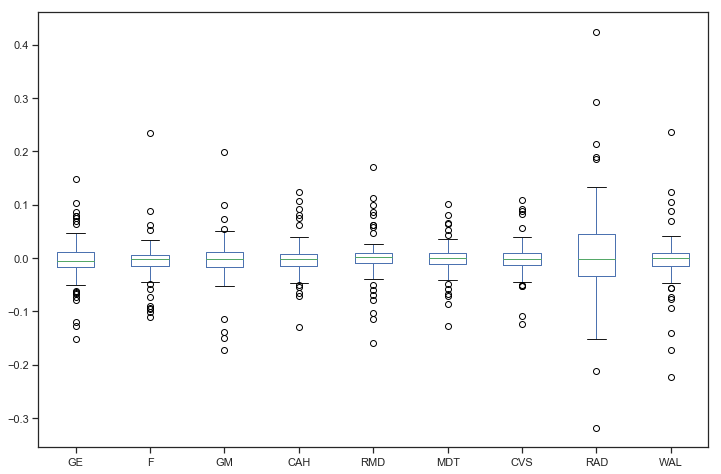

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

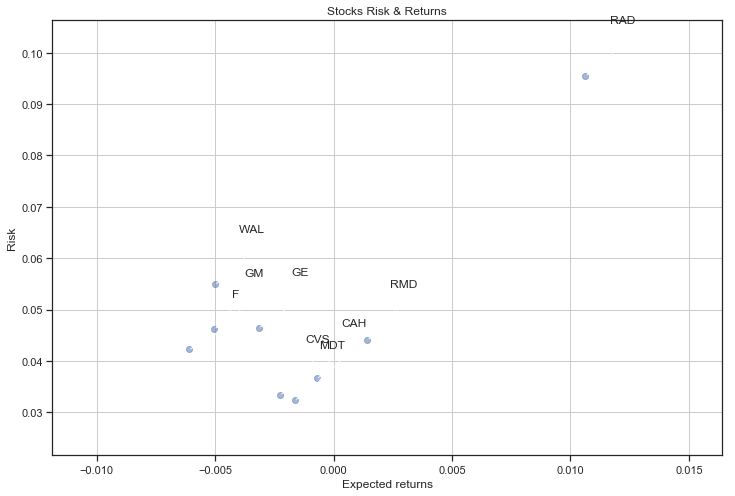

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

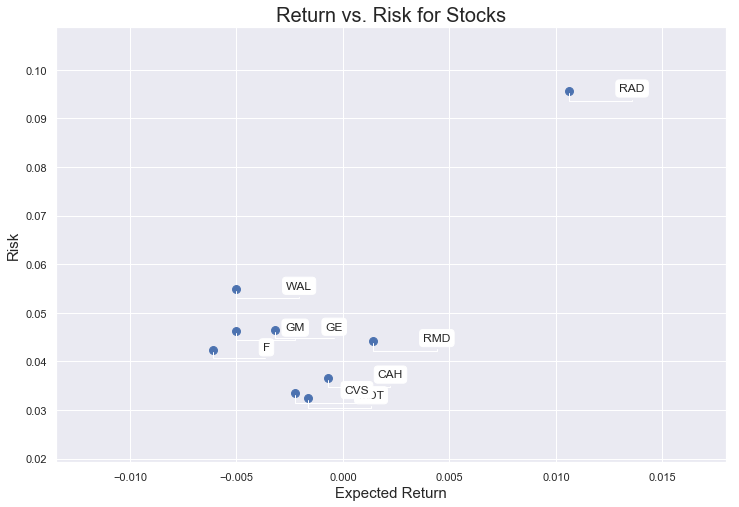

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

WAL  WAL    1.000000
RAD  RAD    1.000000
F    F      1.000000
GM   GM     1.000000
CAH  CAH    1.000000
MDT  MDT    1.000000
CVS  CVS    1.000000
RMD  RMD    1.000000
GE   GE     1.000000
MDT  WAL    0.837459
WAL  MDT    0.837459
GM   F      0.828619
F    GM     0.828619
GM   MDT    0.821094
MDT  GM     0.821094
GM   WAL    0.820197
WAL  GM     0.820197
CVS  CAH    0.816546
CAH  CVS    0.816546
GE   MDT    0.800432
MDT  GE     0.800432
GM   GE     0.788193
GE   GM     0.788193
F    MDT    0.768480
MDT  F      0.768480
F    GE     0.746950
GE   F      0.746950
CAH  RMD    0.726041
RMD  CAH    0.726041
CVS  RMD    0.720843
              ...   
     GM     0.555005
GM   CVS    0.555005
CAH  WAL    0.515512
WAL  CAH    0.515512
F    RMD    0.513466
RMD  F      0.513466
GM   RMD    0.500164
RMD  GM     0.500164
CAH  F      0.490819
F    CAH    0.490819
RMD  WAL    0.456694
WAL  RMD    0.456694
CVS  F      0.435186
F    CVS    0.435186
RAD  CVS    0.430186
CVS  RAD    0.430186
RAD  CAH    0

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,GE,F,GM,CAH,RMD,MDT,CVS,RAD,WAL
Date,,,,,,,,,
2019-12-03,0.456216,0.280973,0.438667,0.502518,0.493460,0.560373,0.482436,0.398280,0.464683
2019-12-04,0.479782,0.339218,0.485234,0.528695,0.497888,0.594432,0.547075,0.402272,0.521283
2019-12-05,0.473418,0.313143,0.456510,0.472121,0.484718,0.567331,0.500471,0.364951,0.504139
2019-12-06,0.603304,0.348881,0.482322,0.555848,0.492379,0.591707,0.581263,0.470895,0.512999
2019-12-09,0.474026,0.316411,0.452762,0.472184,0.458577,0.481927,0.509191,0.397986,0.489154


In [23]:
Normalized_Value.corr()

,GE,F,GM,CAH,RMD,MDT,CVS,RAD,WAL
GE,1.000000,0.746950,0.788193,0.678642,0.619876,0.800432,0.671014,0.191933,0.695564
F,0.746950,1.000000,0.828619,0.490819,0.513466,0.768480,0.435186,0.076675,0.613224
GM,0.788193,0.828619,1.000000,0.581750,0.500164,0.821094,0.555005,0.070843,0.820197
CAH,0.678642,0.490819,0.581750,1.000000,0.726041,0.661041,0.816546,0.378033,0.515512
RMD,0.619876,0.513466,0.500164,0.726041,1.000000,0.596323,0.720843,0.329223,0.456694
MDT,0.800432,0.768480,0.821094,0.661041,0.596323,1.000000,0.666279,0.094568,0.837459
CVS,0.671014,0.435186,0.555005,0.816546,0.720843,0.666279,1.000000,0.430186,0.564280
RAD,0.191933,0.076675,0.070843,0.378033,0.329223,0.094568,0.430186,1.000000,0.066987
WAL,0.695564,0.613224,0.820197,0.515512,0.456694,0.837459,0.564280,0.066987,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

WAL  WAL    1.000000
RAD  RAD    1.000000
F    F      1.000000
GM   GM     1.000000
CAH  CAH    1.000000
MDT  MDT    1.000000
CVS  CVS    1.000000
RMD  RMD    1.000000
GE   GE     1.000000
MDT  WAL    0.837459
WAL  MDT    0.837459
GM   F      0.828619
F    GM     0.828619
GM   MDT    0.821094
MDT  GM     0.821094
GM   WAL    0.820197
WAL  GM     0.820197
CVS  CAH    0.816546
CAH  CVS    0.816546
GE   MDT    0.800432
MDT  GE     0.800432
GM   GE     0.788193
GE   GM     0.788193
F    MDT    0.768480
MDT  F      0.768480
F    GE     0.746950
GE   F      0.746950
CAH  RMD    0.726041
RMD  CAH    0.726041
CVS  RMD    0.720843
              ...   
     GM     0.555005
GM   CVS    0.555005
CAH  WAL    0.515512
WAL  CAH    0.515512
F    RMD    0.513466
RMD  F      0.513466
GM   RMD    0.500164
RMD  GM     0.500164
CAH  F      0.490819
F    CAH    0.490819
RMD  WAL    0.456694
WAL  RMD    0.456694
CVS  F      0.435186
F    CVS    0.435186
RAD  CVS    0.430186
CVS  RAD    0.430186
RAD  CAH    0

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
GE    -0.003168
F     -0.006110
GM    -0.005045
CAH   -0.000709
RMD    0.001418
MDT   -0.001637
CVS   -0.002268
RAD    0.010633
WAL   -0.005016
dtype: float64
--------------------------------------------------
Stock risks:
GE     0.046514
F      0.042287
GM     0.046332
CAH    0.036667
RMD    0.044185
MDT    0.032416
CVS    0.033483
RAD    0.095548
WAL    0.054946
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
F,-0.006110,0.042287
GM,-0.005045,0.046332
WAL,-0.005016,0.054946
GE,-0.003168,0.046514
CVS,-0.002268,0.033483
MDT,-0.001637,0.032416
CAH,-0.000709,0.036667
RMD,0.001418,0.044185
RAD,0.010633,0.095548


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
MDT,-0.001637,0.032416
CVS,-0.002268,0.033483
CAH,-0.000709,0.036667
F,-0.006110,0.042287
RMD,0.001418,0.044185
GM,-0.005045,0.046332
GE,-0.003168,0.046514
WAL,-0.005016,0.054946
RAD,0.010633,0.095548


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
GE,-0.003168,0.046514,-0.283100
F,-0.006110,0.042287,-0.380976
GM,-0.005045,0.046332,-0.324721
CAH,-0.000709,0.036667,-0.292073
RMD,0.001418,0.044185,-0.194236
MDT,-0.001637,0.032416,-0.358984
CVS,-0.002268,0.033483,-0.366402
RAD,0.010633,0.095548,0.006622
WAL,-0.005016,0.054946,-0.273284


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
GE,-0.003168,0.046514,-0.283100,0.147300,-0.151592,-0.006267,3.543307
F,-0.006110,0.042287,-0.380976,0.234414,-0.110124,-0.002235,-3.082849
GM,-0.005045,0.046332,-0.324721,0.199432,-0.173228,-0.002286,-0.280634
CAH,-0.000709,0.036667,-0.292073,0.123378,-0.128674,-0.002013,9.148264
RMD,0.001418,0.044185,-0.194236,0.170376,-0.159883,0.002632,8.636851
MDT,-0.001637,0.032416,-0.358984,0.101893,-0.128237,0.000721,2.402941
CVS,-0.002268,0.033483,-0.366402,0.108987,-0.123072,-0.002528,1.843007
RAD,0.010633,0.095548,0.006622,0.423077,-0.317764,-0.002066,-3.052422
WAL,-0.005016,0.054946,-0.273284,0.236462,-0.222780,-0.000536,-0.423312


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
GE,-0.003168,0.046514,-0.283100,0.147300,-0.151592,-0.006267,3.543307,0.000293
F,-0.006110,0.042287,-0.380976,0.234414,-0.110124,-0.002235,-3.082849,-0.000263
GM,-0.005045,0.046332,-0.324721,0.199432,-0.173228,-0.002286,-0.280634,-0.000024
CAH,-0.000709,0.036667,-0.292073,0.123378,-0.128674,-0.002013,9.148264,0.000736
RMD,0.001418,0.044185,-0.194236,0.170376,-0.159883,0.002632,8.636851,0.000696
MDT,-0.001637,0.032416,-0.358984,0.101893,-0.128237,0.000721,2.402941,0.000200
CVS,-0.002268,0.033483,-0.366402,0.108987,-0.123072,-0.002528,1.843007,0.000153
RAD,0.010633,0.095548,0.006622,0.423077,-0.317764,-0.002066,-3.052422,-0.000260
WAL,-0.005016,0.054946,-0.273284,0.236462,-0.222780,-0.000536,-0.423312,-0.000036


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
GE,-0.003168,0.046514,-0.283100,0.147300,-0.151592,-0.006267,3.543307,0.000293,-0.518212
F,-0.006110,0.042287,-0.380976,0.234414,-0.110124,-0.002235,-3.082849,-0.000263,-0.698413
GM,-0.005045,0.046332,-0.324721,0.199432,-0.173228,-0.002286,-0.280634,-0.000024,-0.651471
CAH,-0.000709,0.036667,-0.292073,0.123378,-0.128674,-0.002013,9.148264,0.000736,-0.209340
RMD,0.001418,0.044185,-0.194236,0.170376,-0.159883,0.002632,8.636851,0.000696,0.080455
MDT,-0.001637,0.032416,-0.358984,0.101893,-0.128237,0.000721,2.402941,0.000200,-0.310242
CVS,-0.002268,0.033483,-0.366402,0.108987,-0.123072,-0.002528,1.843007,0.000153,-0.384360
RAD,0.010633,0.095548,0.006622,0.423077,-0.317764,-0.002066,-3.052422,-0.000260,1.918721
WAL,-0.005016,0.054946,-0.273284,0.236462,-0.222780,-0.000536,-0.423312,-0.000036,-0.675430


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
F,-0.006110,0.042287,-0.380976,0.234414,-0.110124,-0.002235,-3.082849,-0.000263,-0.698413
RAD,0.010633,0.095548,0.006622,0.423077,-0.317764,-0.002066,-3.052422,-0.000260,1.918721
WAL,-0.005016,0.054946,-0.273284,0.236462,-0.222780,-0.000536,-0.423312,-0.000036,-0.675430
GM,-0.005045,0.046332,-0.324721,0.199432,-0.173228,-0.002286,-0.280634,-0.000024,-0.651471
CVS,-0.002268,0.033483,-0.366402,0.108987,-0.123072,-0.002528,1.843007,0.000153,-0.384360
MDT,-0.001637,0.032416,-0.358984,0.101893,-0.128237,0.000721,2.402941,0.000200,-0.310242
GE,-0.003168,0.046514,-0.283100,0.147300,-0.151592,-0.006267,3.543307,0.000293,-0.518212
RMD,0.001418,0.044185,-0.194236,0.170376,-0.159883,0.002632,8.636851,0.000696,0.080455
CAH,-0.000709,0.036667,-0.292073,0.123378,-0.128674,-0.002013,9.148264,0.000736,-0.209340
